# **Decision Tree**

Other:  
https://www.kaggle.com/code/faressayah/decision-trees-random-forest-for-beginners

In [1]:
# import required module
import cv2
from pathlib import Path

DATADIR = "D:/RICE DESEASE DATASET/CLASSES/" # Windows/PC
CATEGORIES = ['Bacterial_Blight','Blast','Brown_Spot','False_Smut','Healthy','Hispa','Leaf_Smut','Sheath_blight','Tungro']
IMG_SIZE = 224

In [3]:

# get/check image size
for img in Path(DATADIR + 'Bacterial_Blight').iterdir():
    image = cv2.imread(str(img))
    print(image.shape)

    # get width and height
    height, width = image.shape[:2]

    # display width and height
    print("The height of the image is: ", height)
    print("The width of the image is: ", width)

    break

(3081, 897, 3)
The height of the image is:  3081
The width of the image is:  897


Print Sample

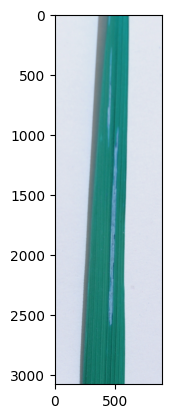

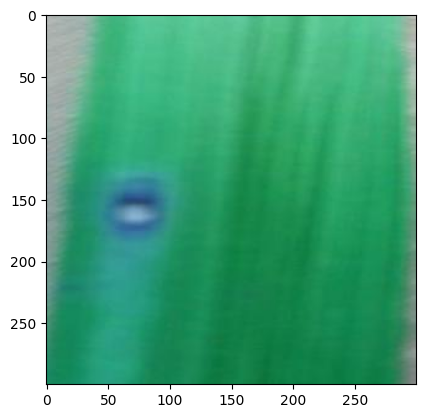

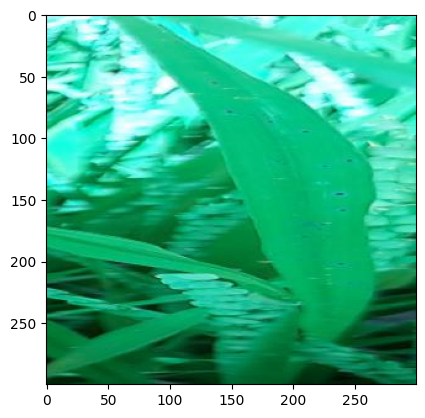

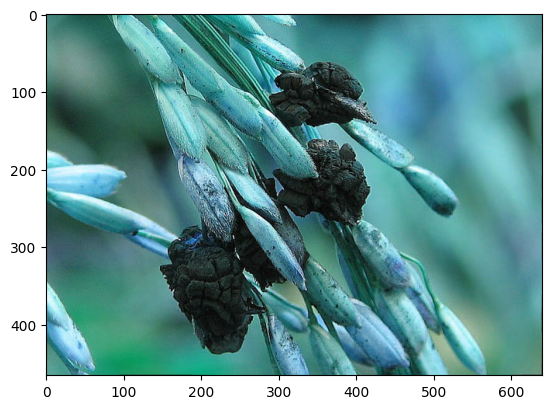

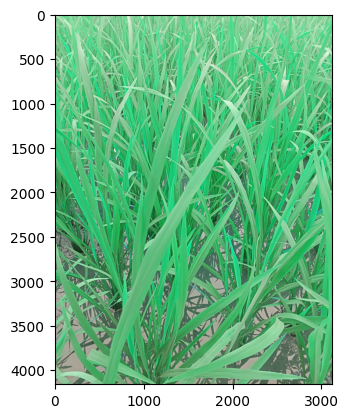

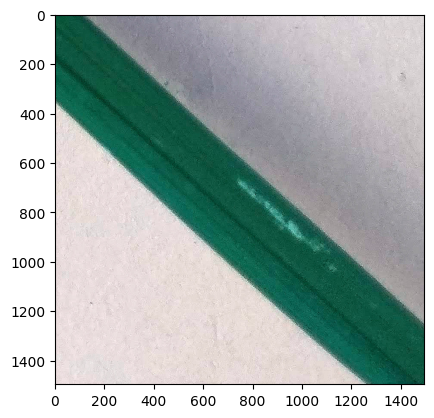

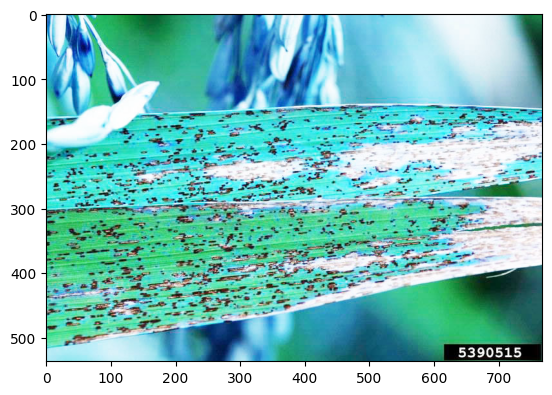

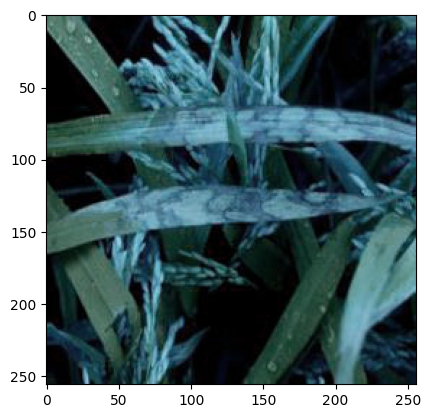

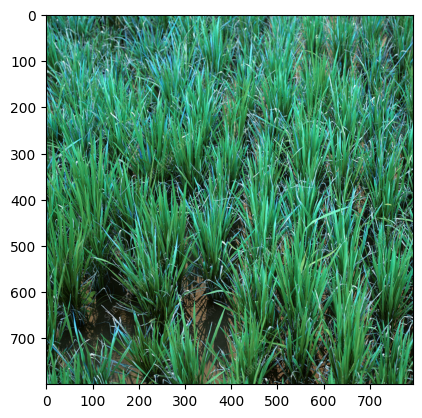

In [4]:

import matplotlib.pyplot as plt
import os

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    #break

In [5]:
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()

print(len(training_data))

8996


In [6]:
lenofimage = len(training_data)

In [7]:
import numpy as np

X=[]
y=[]

for categories, label in training_data:
    X.append(categories)
    y.append(label)
X= np.array(X).reshape(lenofimage,-1)
##X = tf.keras.utils.normalize(X, axis = 1)

In [8]:
X.shape

(8996, 150528)

In [ ]:
# X = X/255.0
# X = np.true_divide(X, 255.)

In [11]:
X[1]

array([214, 222, 238, ..., 218, 221, 235], dtype=uint8)

In [12]:
y=np.array(y)

In [13]:
y.shape

(8996,)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

### **Decision Tree Classifier with criterion gini index**

In [15]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

Predict the Test set results with criterion gini index

In [16]:
y_pred_gini = clf_gini.predict(X_test)

Check accuracy score with criterion gini index

In [17]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.3090


Here, y_test are the true class labels and y_pred_gini are the predicted class labels in the test-set.

Compare the train-set and test-set accuracy  
Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [18]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([5, 4, 8, ..., 4, 8, 8])

In [19]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.3059


Check for overfitting and underfitting

In [20]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.3059
Test set score: 0.3090


Here, the training-set accuracy score is 0.7865 while the test-set accuracy to be 0.8021. These two values are quite comparable. So, there is no sign of overfitting.

### Save the Model

In [21]:
import pickle

# save the model to disk
filename = 'finalized_dt_model.sav'
pickle.dump(clf_gini, open(filename, 'wb'))

In [22]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.30902623388172523


Visualize decision-trees

[Text(0.5, 0.875, 'X[88881] <= 213.5\ngini = 0.889\nsamples = 6747\nvalue = [764, 742, 780, 740, 748, 757, 746, 744, 726]'),
 Text(0.25, 0.625, 'X[149857] <= 13.5\ngini = 0.884\nsamples = 6063\nvalue = [732, 683, 739, 728, 741, 290, 689, 735, 726]'),
 Text(0.125, 0.375, 'X[150514] <= 16.5\ngini = 0.383\nsamples = 398\nvalue = [4, 2, 4, 21, 1, 11, 308, 47, 0]'),
 Text(0.0625, 0.125, 'gini = 0.126\nsamples = 288\nvalue = [0, 0, 0, 9, 0, 5, 269, 5, 0]'),
 Text(0.1875, 0.125, 'gini = 0.711\nsamples = 110\nvalue = [4, 2, 4, 12, 1, 6, 39, 42, 0]'),
 Text(0.375, 0.375, 'X[12055] <= 177.5\ngini = 0.881\nsamples = 5665\nvalue = [728, 681, 735, 707, 740, 279, 381, 688, 726]'),
 Text(0.3125, 0.125, 'gini = 0.865\nsamples = 3691\nvalue = [596, 472, 444, 498, 157, 154, 148, 571, 651]'),
 Text(0.4375, 0.125, 'gini = 0.841\nsamples = 1974\nvalue = [132, 209, 291, 209, 583, 125, 233, 117, 75]'),
 Text(0.75, 0.625, 'X[21840] <= 211.5\ngini = 0.513\nsamples = 684\nvalue = [32, 59, 41, 12, 7, 467, 57, 9,

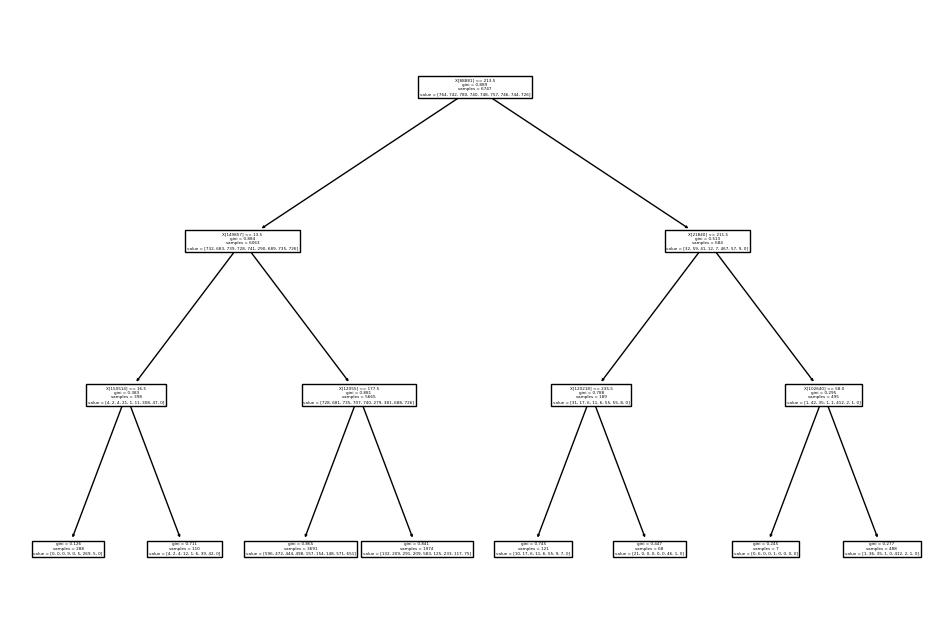

In [23]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))

Visualize decision-trees with graphviz

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph

### **[Decision Tree Classifier with criterion entropy](https://www.kaggle.com/code/prashant111/decision-tree-classifier-tutorial#14.-Decision-Tree-Classifier-with-criterion-entropy-)**

https://www.kaggle.com/code/prashant111/decision-tree-classifier-tutorial

### Confusion matrix

In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_train_gini)

print('Confusion matrix\n\n', cm)

### Classification Report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_train_gini))